## **Lasso Regression**

### **Definisi**

Regresi Lasso adalah varian dari regresi linear yang menambahkan penalti

L1, yang dapat memaksa beberapa koefisien menjadi nol, melakukan seleksi fitur otomatis

### **Cara Kerja**

Lasso mencoba untuk memilih fitur yang paling relevan dengan cara menetapkan koefisien yang tidak penting menjadi nol.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

In [2]:
# import Dataset
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=500, n_features=5, noise=20, bias=180, random_state=42)


# split data test and train
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


# Standarisation Data (X) train and test
SK = StandardScaler()

X_train = SK.fit_transform(X_train, y_train)
X_test = SK.transform(X_test)

In [3]:
from sklearn.linear_model import Lasso


# init instance of Model
Lasso_model = Lasso()

# train Data features (X) with Linear Regression Model
Lasso_model.fit(X_train, y_train)

print(Lasso_model.get_params())

{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}


Mean Squared Error: 415.03140979940576
Mean Absolute Error: 16.61678451320102


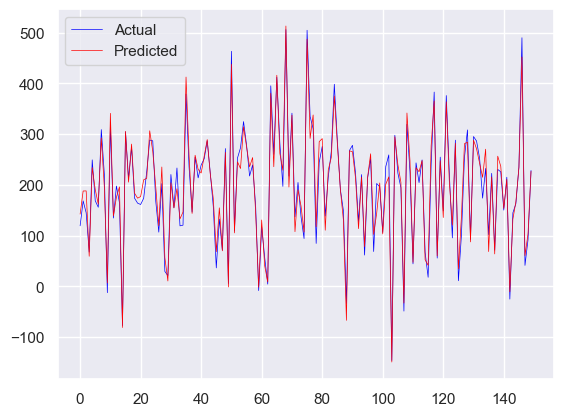

In [4]:
# predict and evalutaion
from sklearn.metrics import mean_squared_error, mean_absolute_error


y_pred =  Lasso_model.predict(X_test)

# evaluate
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")


# ploting data
sns.set()

plt.plot(range(len(y_test)), y_test, label="Actual", color="Blue", linewidth=0.5)
plt.plot(range(len(y_pred)), y_pred, label="Predicted", color="Red", linewidth=0.5)
plt.legend()

plt.show()